<a href="https://colab.research.google.com/github/JayrajRadadiya/Capstone-Project/blob/main/Code/Python%20Codes/Capstone_ML_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone ML Models

In [1]:
#Importing Libraries and Autheticating
import pandas as pd
import numpy as np
from google.colab import auth
auth.authenticate_user()

In [2]:
import pandas_gbq

Demographics= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Demographics`',project_id='surveyproject-378222', dialect='standard') 
Accommodation = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation`',project_id='surveyproject-378222', dialect='standard')
Accommodation_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation_feedback`',project_id='surveyproject-378222', dialect='standard')
Academic = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic`',project_id='surveyproject-378222', dialect='standard')
Academic_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic_feedback`',project_id='surveyproject-378222', dialect='standard')
Services = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Services`',project_id='surveyproject-378222', dialect='standard')
Feedback= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Feedback`',project_id='surveyproject-378222', dialect='standard') 
Base_Survey_Table= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Base_Survey_Table`',project_id='surveyproject-378222', dialect='standard') 

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [3]:
acf = Accommodation_feedback.copy()
label_map = {'\xa0Dissatisfied': 2, 'Neutral': 3, 'Highly Dissatisfied': 1, 'Satisfied': 4, 'Highly Satisfied': 5}
cols_to_map = ['Accm_finding_score', 'Accm_Quality_Score', 'Accm_affordibility_score','Commute_score','Needs_Availibility_Score']
acf[cols_to_map] = acf[cols_to_map].applymap(label_map.get)
weights = {'A': 0.20, 'B': 0.20, 'C': 0.20, 'D': 0.20, 'E': 0.20}
acf['Acc_score'] = ((acf['Accm_finding_score']*weights['A']) + (acf['Accm_Quality_Score']*weights['B']) + (acf['Accm_affordibility_score']*weights['C'])+ (acf['Commute_score']*weights['D']) + (acf['Needs_Availibility_Score']*weights['E']))
acf['Scaled_Acc_score']=acf['Acc_score']/5
acc_Score =acf[['ID','Acc_score']]
s_acc_Score =acf[['ID','Scaled_Acc_score']]
acf.head()

,ID,Accm_finding_score,Accm_Quality_Score,Accm_affordibility_score,Commute_score,Needs_Availibility_Score,Acc_score,Scaled_Acc_score
0,232,3,2,4,3,3,3.0,0.60
1,47,3,3,3,4,3,3.2,0.64
2,273,3,3,2,3,3,2.8,0.56
3,267,3,3,3,3,3,3.0,0.60
4,191,3,2,4,5,3,3.4,0.68


In [4]:
af=Academic_feedback.copy()
weights = {'A': 0.25, 'B': 0.25, 'C': 0.0, 'D': 0.25, 'E': 0.25}
af['Acd_score'] = ((af['Timetable_Schedules_score']*weights['A']) + (af['Section_Allocation_score']*weights['B']) + (af['Class_Hours_Score']*weights['C'])+ (af['Course_Contents_Score']*weights['D']) + (af['Afterclass_Workload_score']*weights['E']))
af['Scaled_Acd_score']=af['Acd_score']/5
acd_score =af[['ID','Acd_score']]
s_acd_score =af[['ID','Scaled_Acd_score']]
af.head()

,ID,Timetable_Schedules_score,Section_Allocation_score,Class_Hours_Score,Course_Contents_Score,Afterclass_Workload_score,Acd_score,Scaled_Acd_score
0,81,1,1,1,1,1,1.0,0.2
1,195,1,1,1,1,1,1.0,0.2
2,93,1,1,1,1,1,1.0,0.2
3,323,1,1,1,1,1,1.0,0.2
4,337,1,1,1,1,1,1.0,0.2


## Method 1 : Label Encoding

In [5]:
import warnings
warnings.filterwarnings("ignore")

#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mapping_m = {"Other": 0, "Science": 1, "Engineering": 2,"Commerce/Accounting": 3,"Mathematics/Statistics": 4, "Business/Administration": 5,"Technology (Computer Science/Information Technology)": 6}
mapping_ed = {"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)": 0, 'Post Graduate Diploma': 1, "Master's degree (MCA, MBA, M.Tech, MSc...)": 2,"Doctorate (PhD, M.Phil)": 3}
mapping_yrs = { "2 - 5 Years": 1, "6 - 10 Years": 2,"10 - 15 Years": 3,"0 - 1 Years": 0, "15 + Years": 4}
mapping_gender = {"Prefer not to say": 0, 'Male\xa0': 1, "Female": 2}
mapping_age = {"18-25":0, "26-35":1, "36-45": 2,"45 and above": 3}

d2['Enc_Edcucation_lvl'] = d2['Education_lvl'].map(mapping_ed)
d2['Enc_Majors'] = d2['Majors'].map(mapping_m)
d3['Enc_Yrs_exp'] = d3['Yrs_exp'].map(mapping_yrs)
d4['Enc_Age'] = d4['Age'].map(mapping_age)
d4['Enc_Gender'] = d4['Gender'].map(mapping_gender)

d3["Enc_Yrs_exp"]=d3["Enc_Yrs_exp"].replace(np.nan,0)

demo1= pd.merge(d2, d3, on='ID')
demo1 = pd.merge(demo1, d4, on='ID')

demo1=demo1.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo1 = demo1.astype(int)
demo1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender
0,63,0,6,0,0,1
1,124,0,2,0,0,1
2,247,0,4,1,0,1
3,225,0,6,0,0,1
4,232,0,6,0,0,2
...,...,...,...,...,...,...
345,343,2,6,2,2,1
346,3,0,6,4,2,1
347,48,0,6,4,2,1
348,345,2,4,2,3,2


## Method 2 - One-hot Encoding

In [6]:
import warnings
warnings.filterwarnings("ignore")
#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

# One hot Encoding using get dummies
oh_ed_lvl = pd.get_dummies(d2['Education_lvl'])
d2 = pd.concat([d2, oh_ed_lvl] ,axis=1)
oh_major = pd.get_dummies(d2['Majors'])
d2 = pd.concat([d2, oh_major], axis=1)

oh_yrs_exp = pd.get_dummies(d3['Yrs_exp'])
d3 = pd.concat([d3, oh_yrs_exp], axis=1)

oh_gn = pd.get_dummies(d4['Gender'])
d4 = pd.concat([d4, oh_gn], axis=1)
oh_Age= pd.get_dummies(d4['Age'])
d4 = pd.concat([d4, oh_Age], axis=1)

demo2= pd.merge(d2, d3, on='ID')
demo2 = pd.merge(demo2, d4, on='ID')

demo2=demo2.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo2 = demo2.astype(int)
demo2

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,2 - 5 Years,6 - 10 Years,None,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above
0,63,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,124,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,247,1,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
3,225,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,232,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,343,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
346,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
347,48,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
348,345,0,0,1,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,0,1


# Final DFs

In [7]:

# df1 -> Mixed Encoding
df1= pd.merge(demo1, acc_Score, on='ID')
df1 = pd.merge(df1, acd_score, on='ID')
df1['Acd_score']=df1['Acd_score']
df1['Acc_score']=df1['Acc_score']
df1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score
0,63,0,6,0,0,1,4.4,3.25
1,124,0,2,0,0,1,3.0,2.75
2,247,0,4,1,0,1,2.4,3.5
3,225,0,6,0,0,1,3.2,3.0
4,232,0,6,0,0,2,3.0,2.25
...,...,...,...,...,...,...,...,...
345,343,2,6,2,2,1,2.8,2.5
346,3,0,6,4,2,1,3.6,3.5
347,48,0,6,4,2,1,3.6,2.5
348,345,2,4,2,3,2,3.2,3.0


## **Correlation**

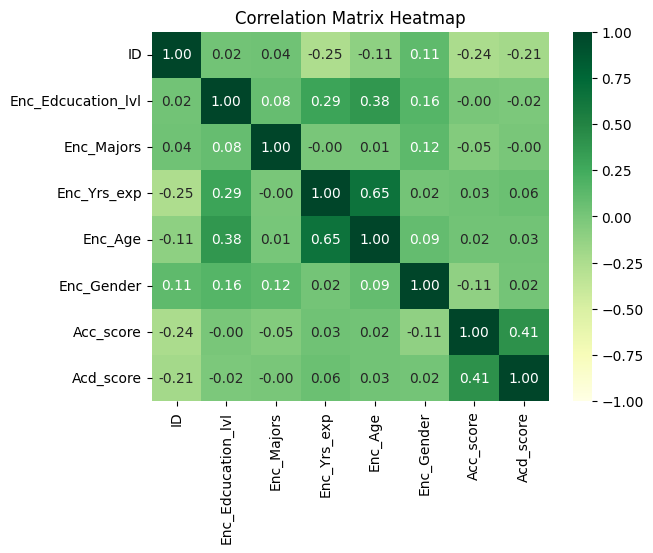

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate correlation matrix
corr_matrix = df1.corr()

# Create heatmap
sns.heatmap(corr_matrix, cmap="YlGn", annot=True, fmt='.2f', vmin=-1, vmax=1, center=0)

# Set plot properties
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

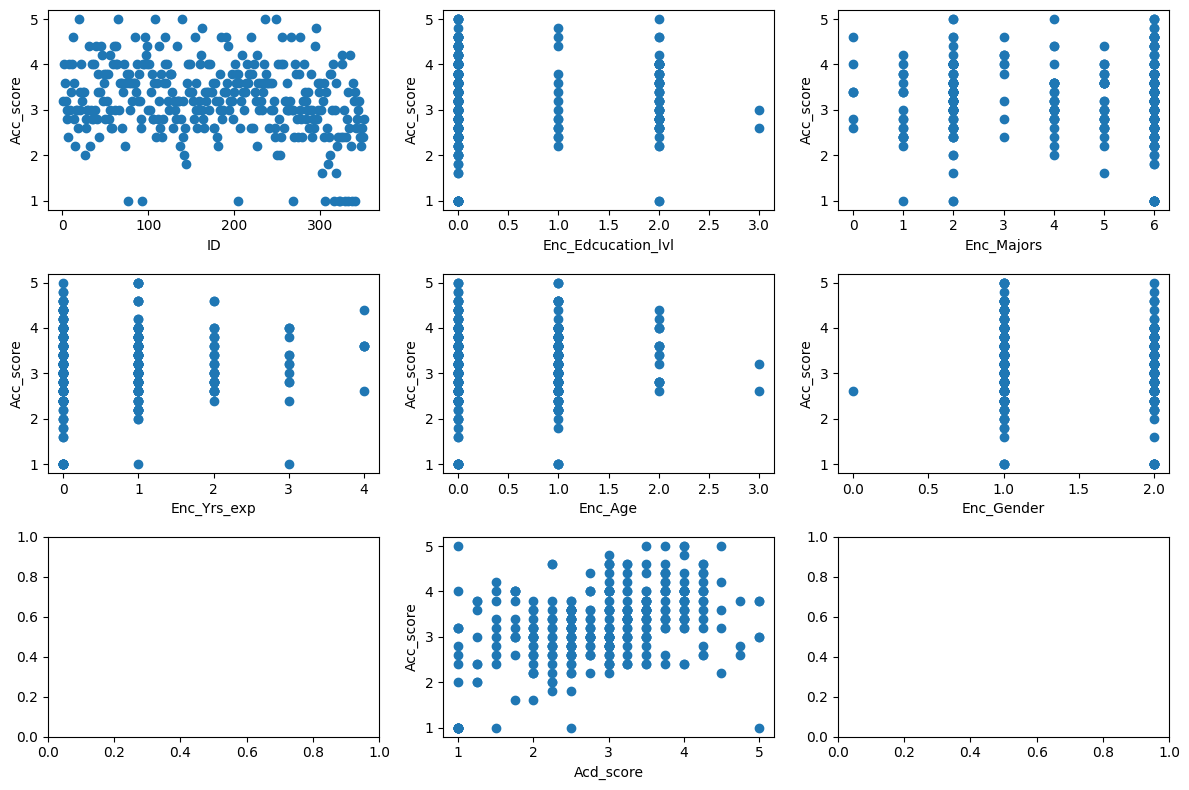

In [9]:
import matplotlib.pyplot as plt

# Set the target column
target_col = "Acc_score"

# Determine the number of rows and columns for the grid
num_cols = 3
num_rows = (len(df1.columns) - 1) // num_cols + 1

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Loop over each feature column and create a scatter plot in the corresponding subplot
for i, col in enumerate(df1.columns):
    if col != target_col:
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx, col_idx]
        ax.scatter(df1[col], df1[target_col])
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)

# Adjust the spacing and layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()


In [10]:
#df2 -> One Hot Encoding
df2= pd.merge(demo2, s_acc_Score, on='ID')
df2 = pd.merge(df2, s_acd_score, on='ID')
df2['Scaled_Acd_score']=df2['Scaled_Acd_score']
df2['Scaled_Acc_score']=df2['Scaled_Acc_score']
df2

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,None,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above,Scaled_Acc_score,Scaled_Acd_score
0,63,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0.88,0.65
1,124,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0.60,0.55
2,247,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0.48,0.7
3,225,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0.64,0.6
4,232,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0.60,0.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,343,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.56,0.5
346,3,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.72,0.7
347,48,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.72,0.5
348,345,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0.64,0.6


In [11]:
df2.corr()

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,None,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above,Scaled_Acc_score,Scaled_Acd_score
ID,1.000000,-0.002199,0.025556,0.037987,-0.073385,0.051413,0.045637,-0.135098,0.056895,-0.121492,...,0.204127,0.114948,-0.113749,-0.009931,0.127213,-0.114834,-0.048302,0.050973,-0.241140,-0.207954
"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)",-0.002199,1.000000,-0.141567,-0.849403,-0.408718,-0.330354,-0.114209,0.218785,-0.074700,-0.021577,...,0.207072,-0.169432,0.180094,-0.099960,0.364984,-0.278184,-0.155063,-0.141567,0.000657,0.009751
"Doctorate (PhD, M.Phil)",0.025556,-0.141567,1.000000,-0.034483,-0.016593,0.107466,-0.013001,0.038966,-0.023633,-0.010830,...,0.096834,0.014100,-0.090673,0.706093,-0.078905,0.088567,-0.017652,-0.005747,-0.042283,-0.000588
"Master's degree (MCA, MBA, M.Tech, MSc...)",0.037987,-0.849403,-0.034483,1.000000,-0.099555,0.250254,0.104010,-0.192394,0.098342,-0.064980,...,-0.184298,0.177132,-0.174303,-0.024348,-0.306517,0.209140,0.168674,0.166667,0.013801,-0.022064
Post Graduate Diploma,-0.073385,-0.408718,-0.016593,-0.099555,1.000000,0.167880,0.044574,-0.102830,-0.020084,0.164153,...,-0.114984,0.012880,-0.011596,-0.011716,-0.145665,0.144939,0.010971,-0.016593,-0.010953,0.020597
Business/Administration,0.051413,-0.330354,0.107466,0.250254,0.167880,1.000000,-0.054403,-0.193621,-0.098889,-0.045317,...,-0.146230,0.038835,-0.036951,-0.016980,-0.230963,0.169935,0.105666,0.107466,-0.020908,-0.091325
Commerce/Accounting,0.045637,-0.114209,-0.013001,0.104010,0.044574,-0.054403,1.000000,-0.104677,-0.053462,-0.024500,...,-0.063598,0.031898,-0.030868,-0.009180,-0.041193,-0.007935,0.115361,-0.013001,0.108962,0.040597
Engineering,-0.135098,0.218785,0.038966,-0.192394,-0.102830,-0.193621,-0.104677,1.000000,-0.190273,-0.087195,...,-0.054271,-0.167486,0.157795,0.087699,0.110597,-0.067257,-0.083943,-0.046272,0.067313,0.013588
Mathematics/Statistics,0.056895,-0.074700,-0.023633,0.098342,-0.020084,-0.098889,-0.053462,-0.190273,1.000000,-0.044534,...,0.025275,0.088666,-0.086762,-0.016687,0.017713,-0.002210,-0.072586,0.109777,-0.000284,-0.025638
Other,-0.121492,-0.021577,-0.010830,-0.064980,0.164153,-0.045317,-0.024500,-0.087195,-0.044534,1.000000,...,-0.069795,0.005812,-0.004977,-0.007647,-0.107841,0.125585,-0.033264,-0.010830,0.039476,0.051557


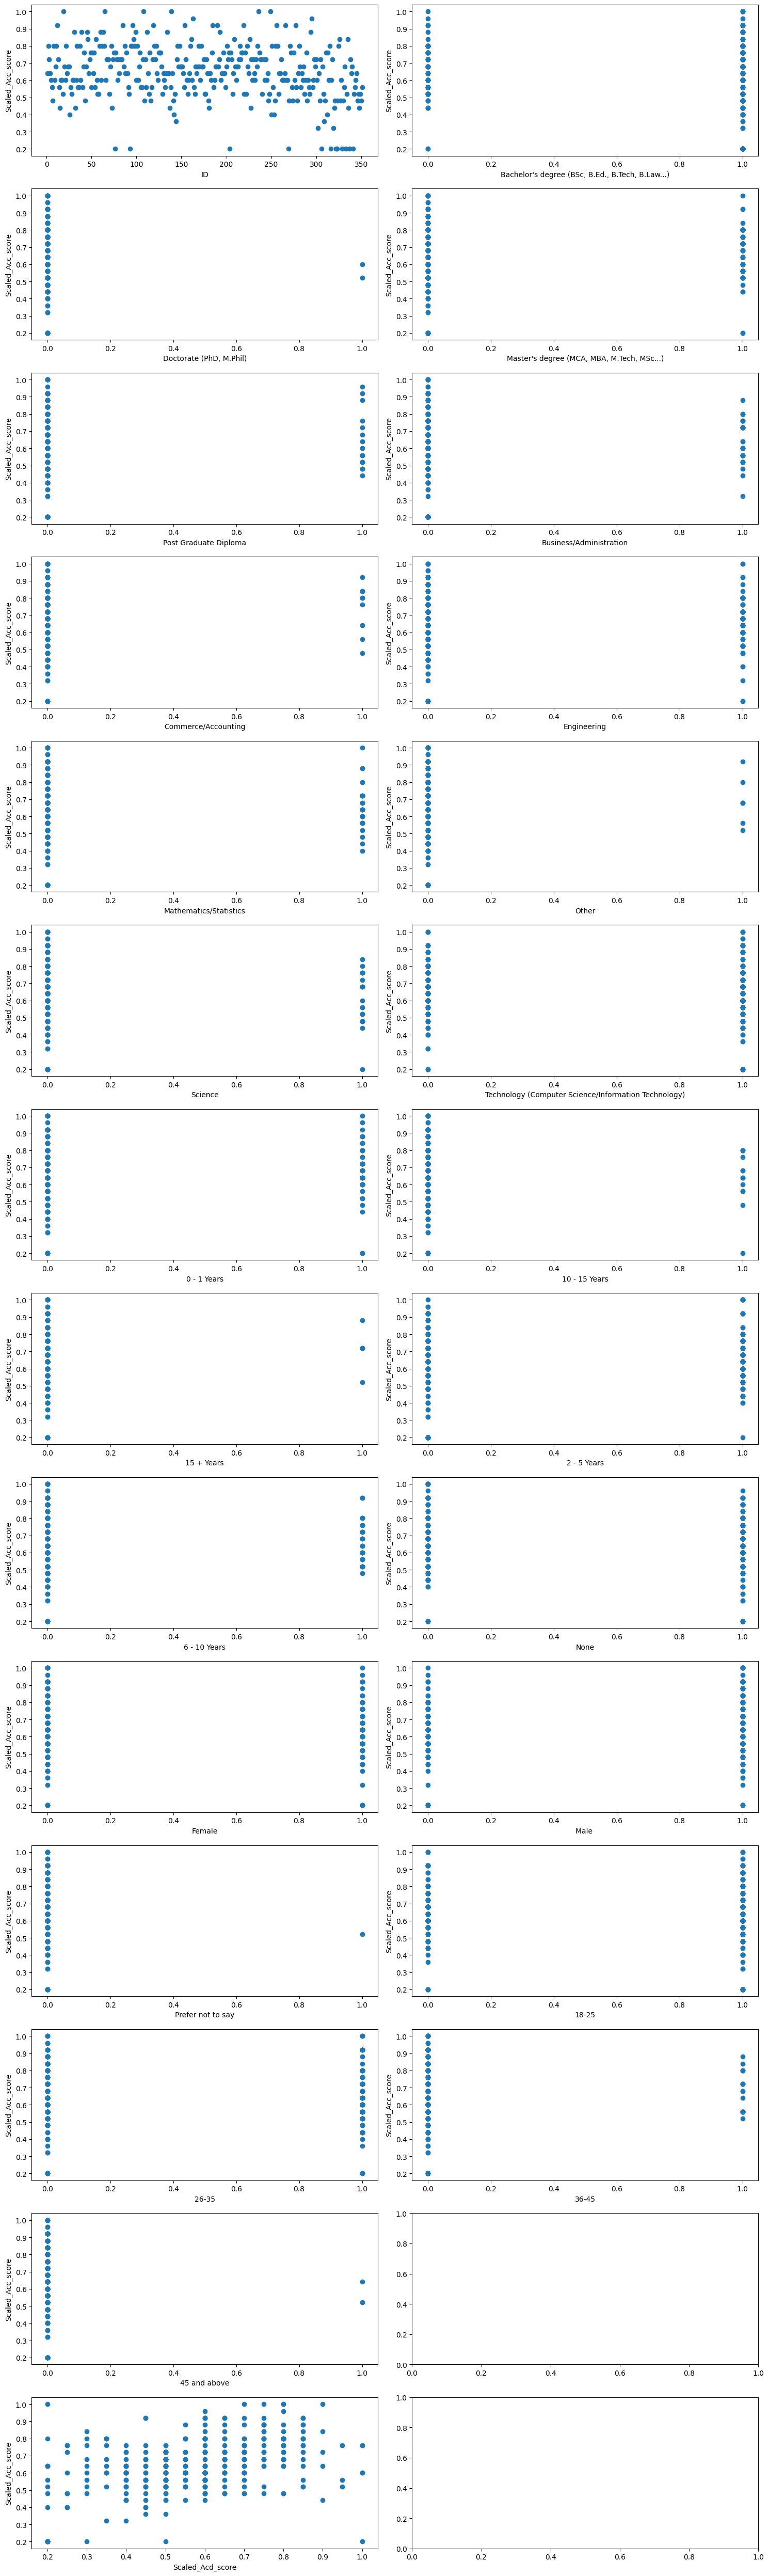

In [12]:
import matplotlib.pyplot as plt

# Set the target column
target_col = "Scaled_Acc_score"

# Determine the number of rows and columns for the grid
num_cols = 2
num_rows = (len(df2.columns) - 1) // num_cols + 1

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 50))

# Loop over each feature column and create a scatter plot in the corresponding subplot
for i, col in enumerate(df2.columns):
    if col != target_col:
        row_idx = i // num_cols
        col_idx = i % num_cols
        ax = axes[row_idx, col_idx]
        ax.scatter(df2[col], df2[target_col])
        ax.set_xlabel(col)
        ax.set_ylabel(target_col)

# Adjust the spacing and layout of the subplots
plt.tight_layout()

# Display the plot
plt.show()

# ML on - Label Encoded Data 

## Train/Test Data 

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  350 non-null    int64  
 1   Enc_Edcucation_lvl  350 non-null    int64  
 2   Enc_Majors          350 non-null    int64  
 3   Enc_Yrs_exp         350 non-null    int64  
 4   Enc_Age             350 non-null    int64  
 5   Enc_Gender          350 non-null    int64  
 6   Acc_score           350 non-null    float64
 7   Acd_score           350 non-null    Float64
dtypes: Float64(1), float64(1), int64(6)
memory usage: 25.0 KB


In [14]:
X=df1.drop(['ID','Acd_score'],axis=1)
y=df1['Acd_score']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## Decision Tree Regressor 

In [28]:
y_test=y_test.astype('float64')

Best parameters: {'max_depth': 2, 'min_samples_leaf': 2}
Best mean squared error: 0.77815
Mean squared error: 0.76286
Mean absolute error: 0.66169
R-squared score: 0.15892


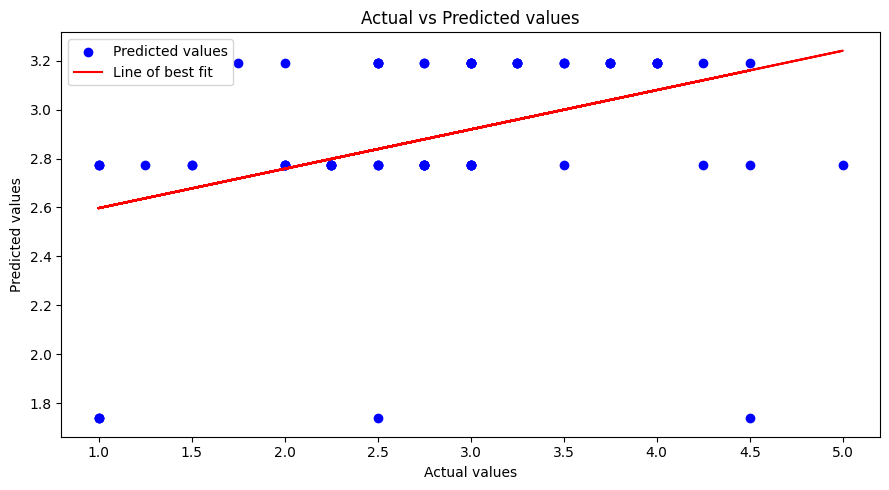

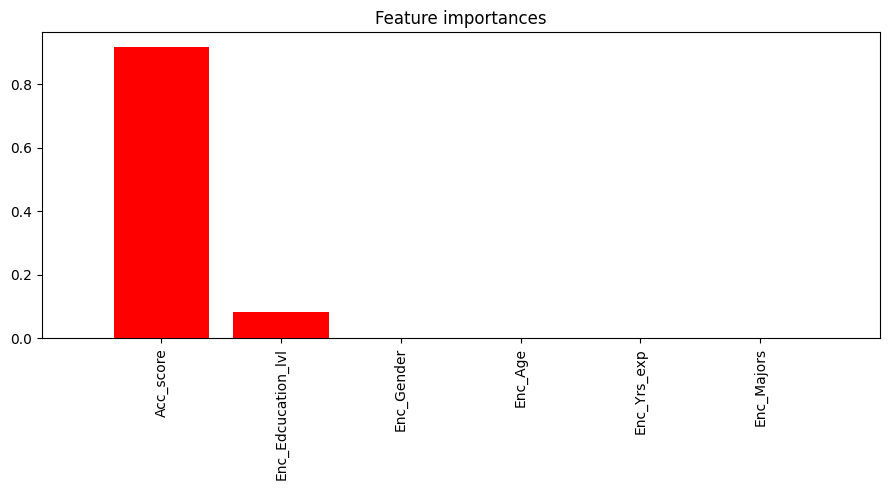

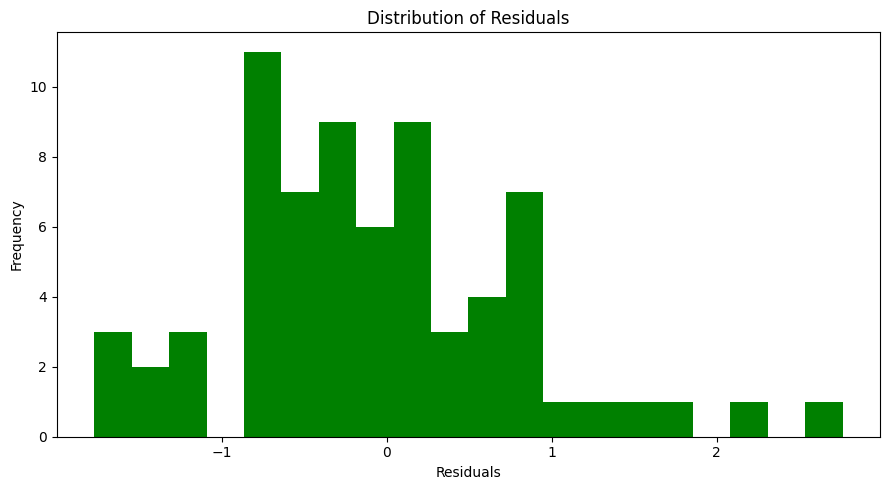

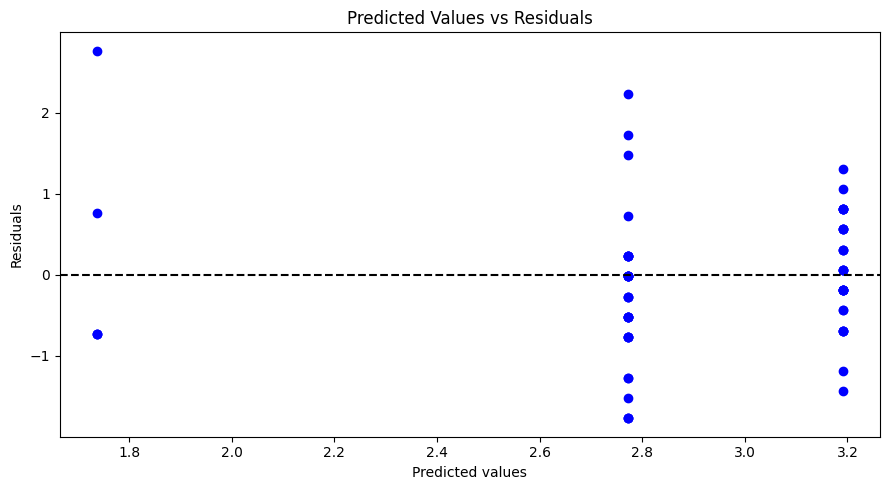

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)


# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")


# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='b', label='Predicted values')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='g')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='b')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")

## Support Vector Regressor

Best parameters: {'C': 10, 'gamma': 0.001}
Best mean squared error: 0.73015
Mean squared error: 0.72530
Mean absolute error: 0.66548
R-squared score: 0.20033


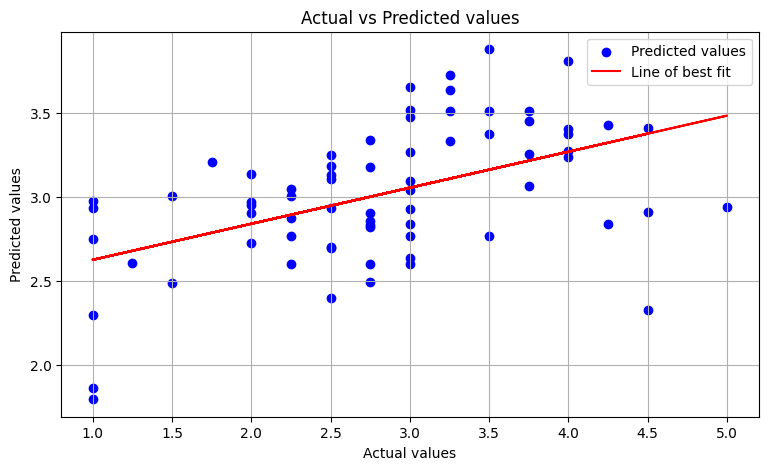

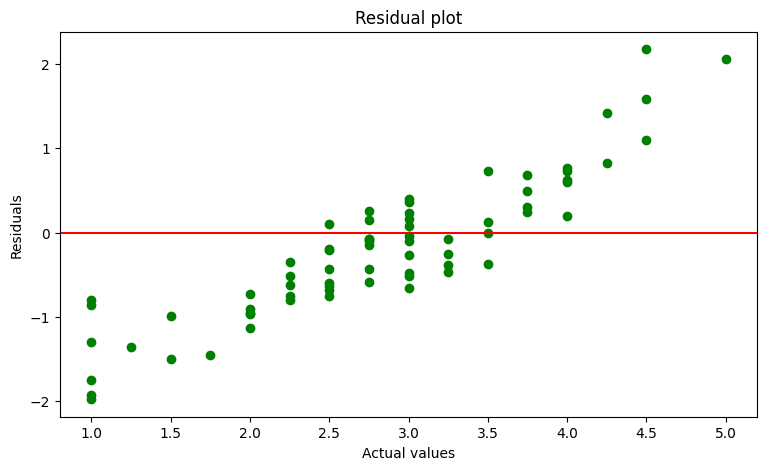

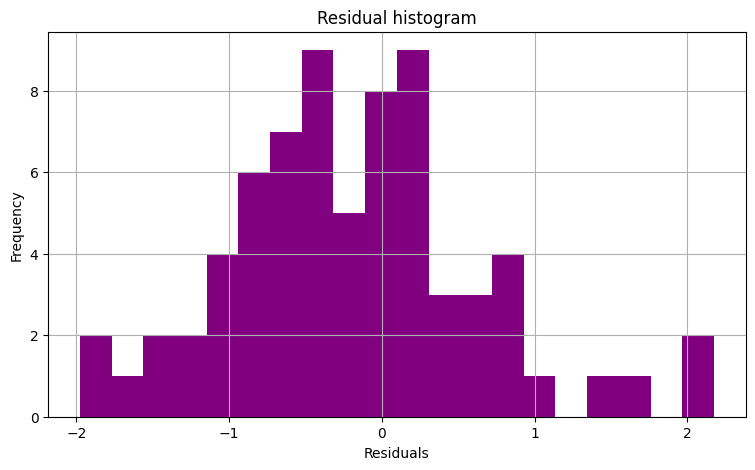

In [32]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid = {
    'C': [0.01,0.1, 1, 10, 100],
    'gamma': [0.001,0.01, 0.1, 1, 'scale']
}
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_test, y_pred, c='blue', label='Predicted values')# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Actual vs Predicted values')
ax.legend()
ax.grid(True)
plt.show()
print("==========================================================================================================================")
# Plot the residuals
fig, ax = plt.subplots(figsize=(9,5))
residuals = y_test - y_pred
ax.scatter(y_test, residuals, c='green')
ax.axhline(y=0, color='red')
ax.set_xlabel('Actual values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot a histogram of the residuals
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(residuals, bins=20, color='purple')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Residual histogram')
ax.grid(True)
plt.show()
print("==========================================================================================================================")

## Random Forest Regressor

Best hyperparameters: {'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 100}
Best negative mean squared error: 0.75565


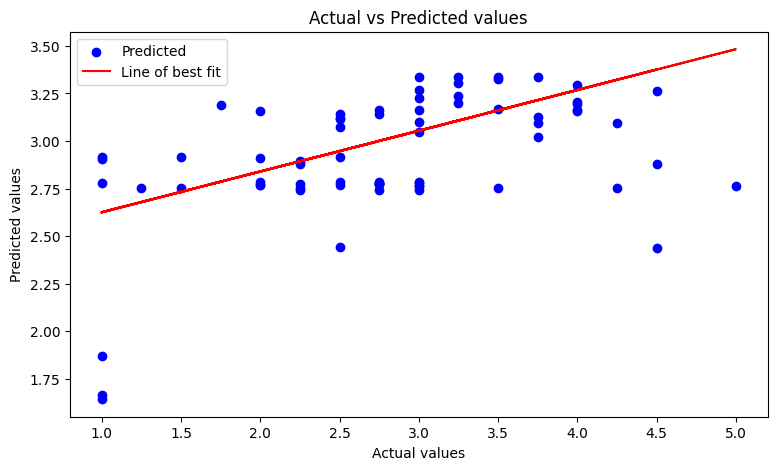

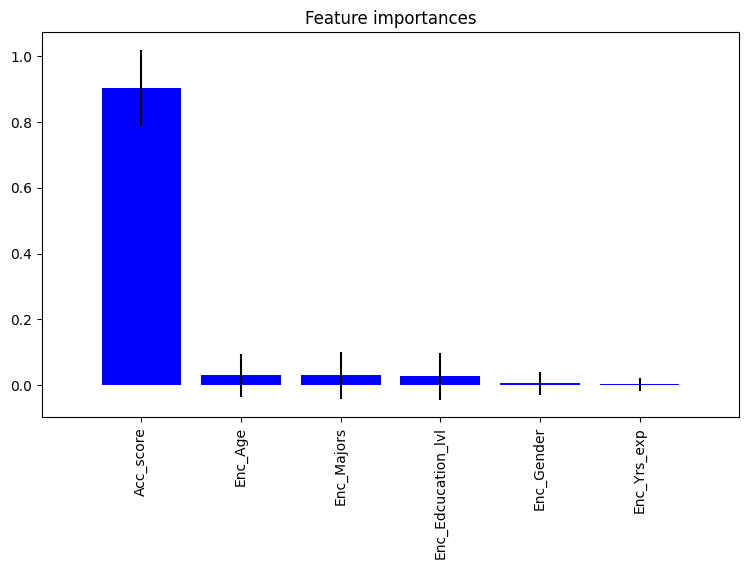

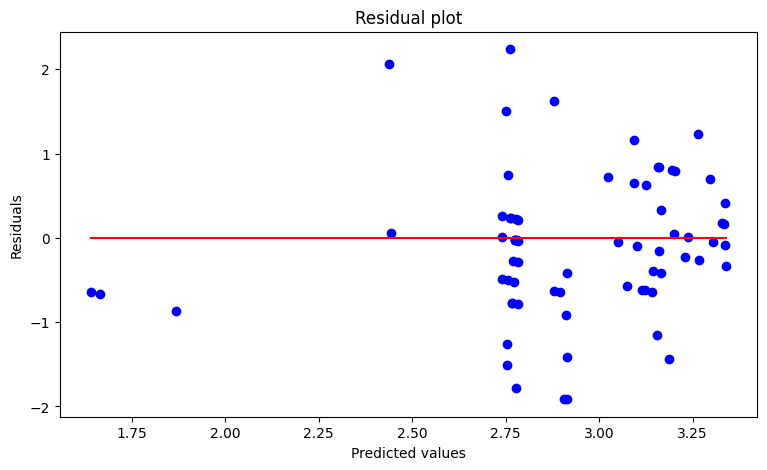

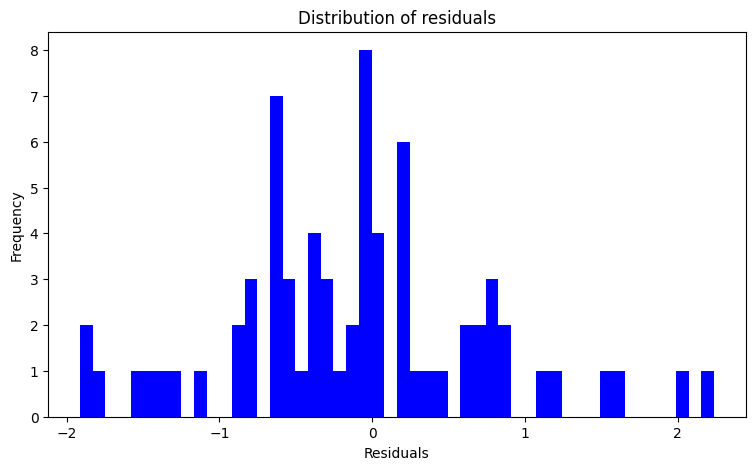

Mean squared error: 0.72393
Mean absolute error: 0.64512
R-squared score: 0.20184


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best negative mean squared error: {:.5f}".format(-grid_search.best_score_))
y_predicted = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mean_squared_error_value = mean_squared_error(y_test, y_predicted)
mean_absolute_error_value = mean_absolute_error(y_test, y_predicted)
r2_score_value = r2_score(y_test, y_predicted)
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_predicted, color='b', label='Predicted')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_search.best_estimator_.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()
print("==========================================================================================================================")
# Plot residuals
residuals = y_test - y_predicted
plt.figure(figsize=(9,5))
plt.scatter(y_predicted, residuals, color='b')
plt.plot([min(y_predicted), max(y_predicted)], [0, 0], color='r')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot distribution of residuals
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=50, color='b')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of residuals')
plt.show()
print("==========================================================================================================================")
print("Mean squared error: {:.5f}".format(mean_squared_error_value))
print("Mean absolute error: {:.5f}".format(mean_absolute_error_value))
print("R-squared score: {:.5f}".format(r2_score_value))


## Gradient Boosting Regressor

Best parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 50}
Best mean squared error: 0.83163
Mean squared error: 0.74443
Mean absolute error: 0.67162
R-squared score: 0.17924


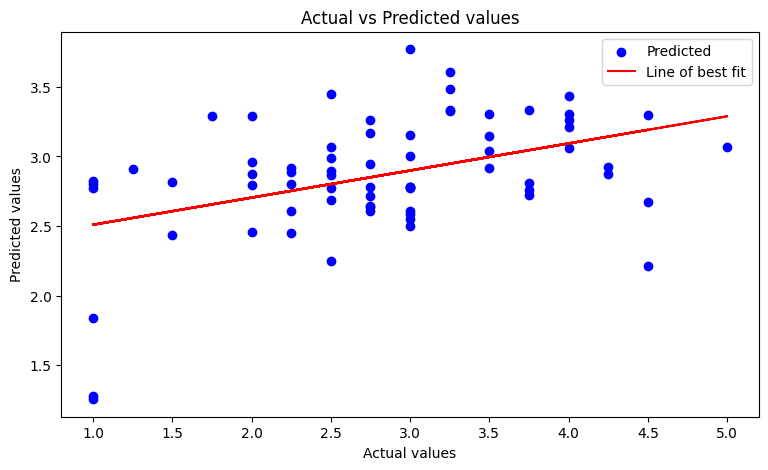

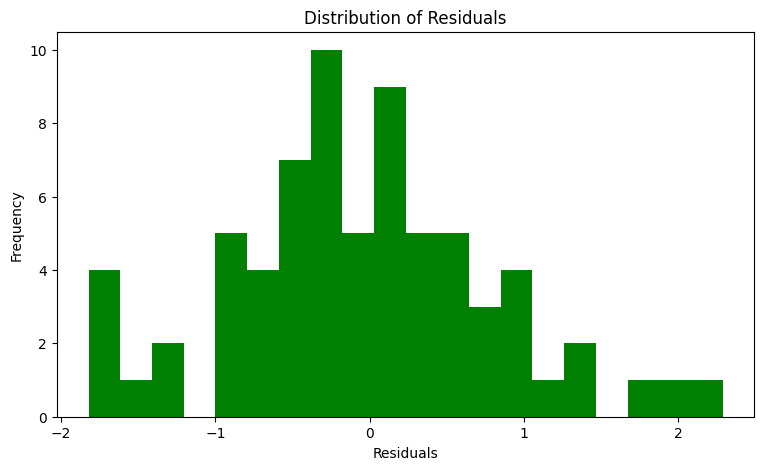

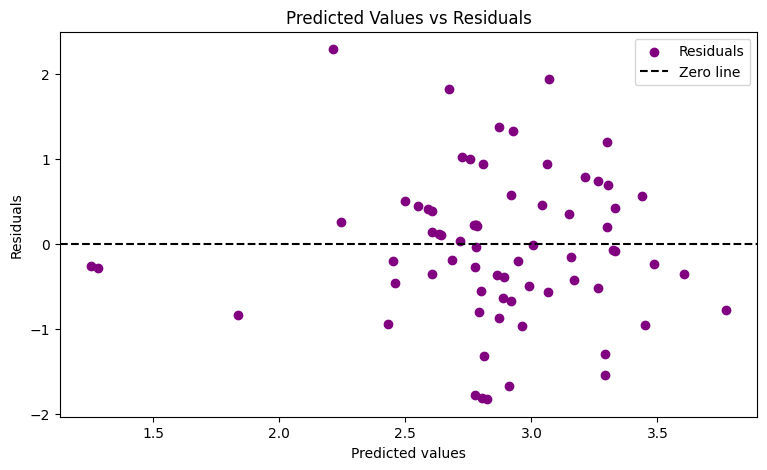

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero line')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.legend()
plt.show()
print("==========================================================================================================================")

In [ ]:
# define the data dictionary
data = {'Model name': ['Decision Tree Regressor', 'Support Vector Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
        'R-squared score': [0.12350, 0.06149, 0.09725, 0.08560]}

# create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# highlight good R-squared scores with light blue color
def highlight_good_scores(val):
    color = 'lightblue' if val >= 0.1 else ''
    return f'background-color: {color}'

# apply the highlight function to the DataFrame
styled_df = df.style.applymap(highlight_good_scores, subset=['R-squared score'])

# set the border property
styled_df = styled_df.set_properties(**{'border': '1px solid black'})

# display the styled DataFrame
display(styled_df)


,Model name,R-squared score
0,Decision Tree Regressor,0.123500
1,Support Vector Regressor,0.061490
2,Random Forest Regressor,0.097250
3,Gradient Boosting Regressor,0.085600


# ML on - One Hot Encoded Data 

## Train/Test Data  

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 27 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    350 non-null    int64  
 1   Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)      350 non-null    int64  
 2   Doctorate (PhD, M.Phil)                               350 non-null    int64  
 3   Master's degree (MCA, MBA, M.Tech, MSc...)            350 non-null    int64  
 4   Post Graduate Diploma                                 350 non-null    int64  
 5   Business/Administration                               350 non-null    int64  
 6   Commerce/Accounting                                   350 non-null    int64  
 7   Engineering                                           350 non-null    int64  
 8   Mathematics/Statistics                                350 no

In [ ]:
X=df2.drop(['ID','Scaled_Acd_score'],axis=1)
y=df2['Scaled_Acd_score']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18)

## Decision Tree Regressor 

Best parameters: {'max_depth': 2, 'min_samples_leaf': 2}
Best mean squared error: 0.77815
Mean squared error: 0.76286
Mean absolute error: 0.66169
R-squared score: 0.15892


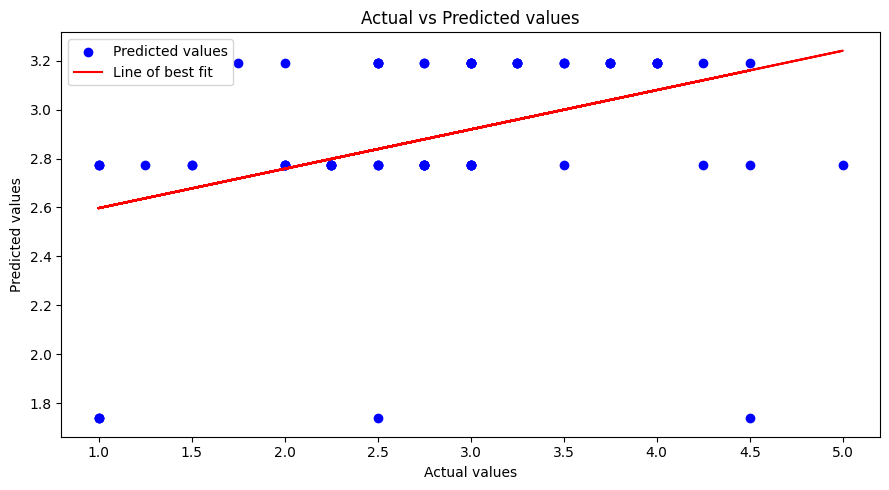

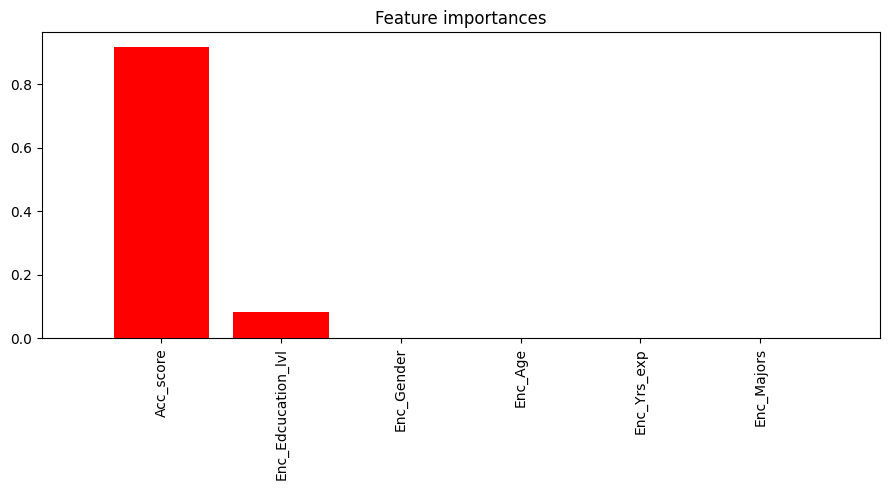

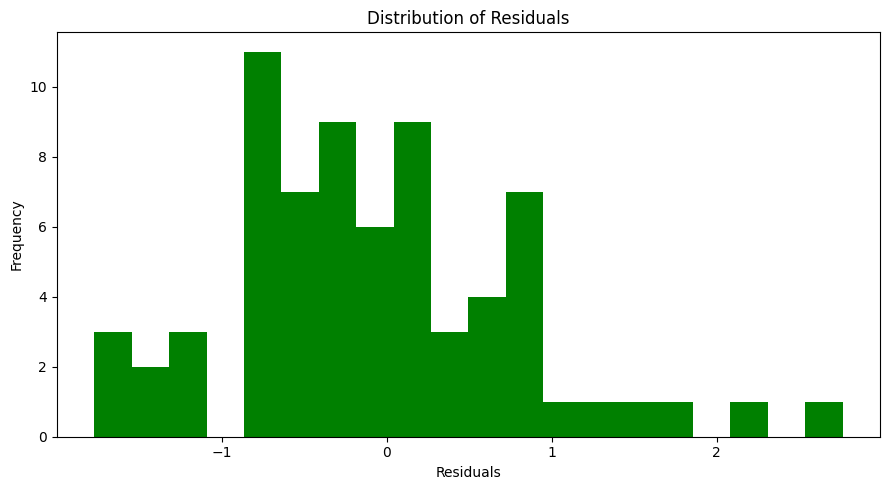

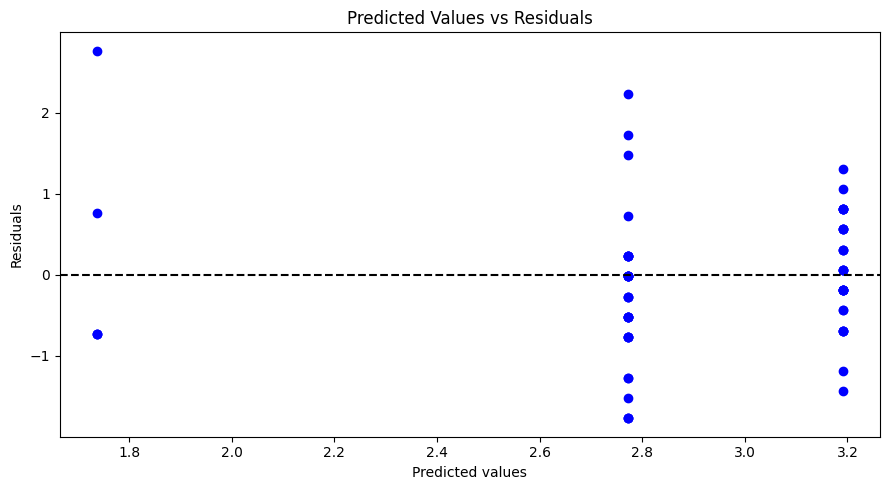

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
tree_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype("float64")

# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")


# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='b', label='Predicted values')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()


print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='g')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='b')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.axhline(y=0, color='k', linestyle='--')
plt.tight_layout()
plt.show()
print("==========================================================================================================================")

## Support Vector Regressor

Best parameters: {'C': 10, 'gamma': 0.001}
Best mean squared error: 0.73015
Mean squared error: 0.72530
Mean absolute error: 0.66548
R-squared score: 0.20033


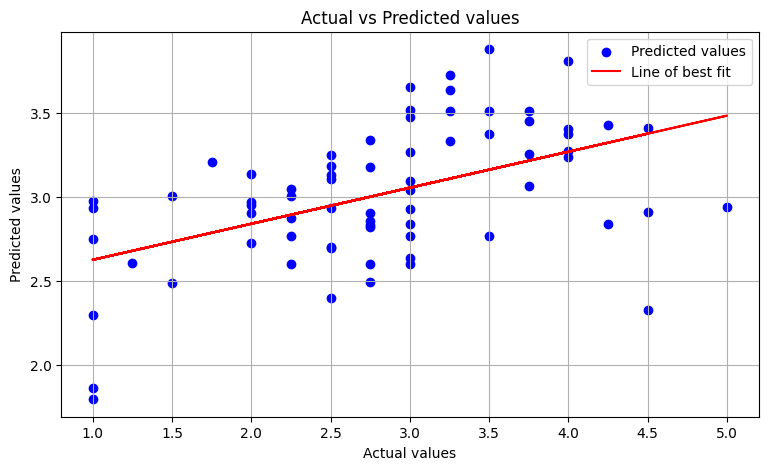

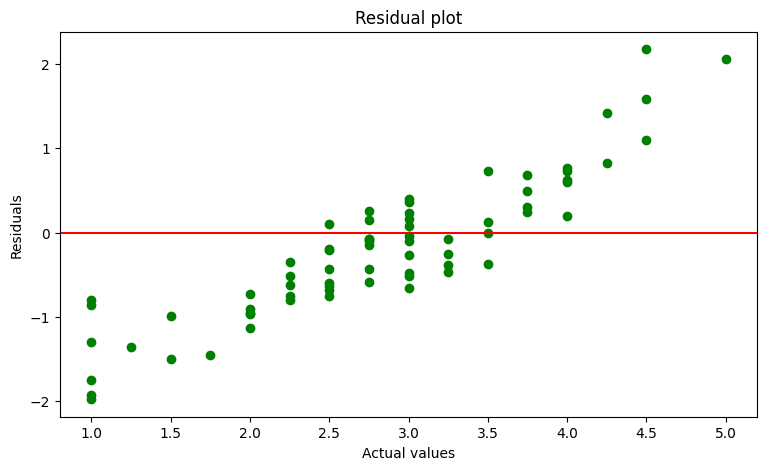

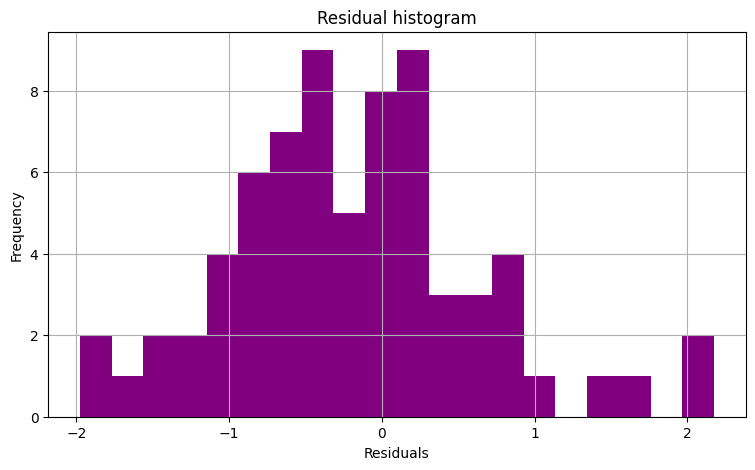

In [39]:
# Import necessary libraries
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid = {
    'C': [0.01,0.1, 1, 10, 100],
    'gamma': [0.001,0.01, 0.1, 1, 'scale']
}
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(y_test, y_pred, c='b', label='Predicted values')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
ax.set_xlabel('Actual values')
ax.set_ylabel('Predicted values')
ax.set_title('Actual vs Predicted values')
ax.legend()
ax.grid(True)
plt.show()
print("==========================================================================================================================")
# Plot the residuals
fig, ax = plt.subplots(figsize=(9,5))
residuals = y_test - y_pred
ax.scatter(y_test, residuals, c='green')
ax.axhline(y=0, color='red')
ax.set_xlabel('Actual values')
ax.set_ylabel('Residuals')
ax.set_title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot a histogram of the residuals
fig, ax = plt.subplots(figsize=(9,5))
ax.hist(residuals, bins=20, color='purple')
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')
ax.set_title('Residual histogram')
ax.grid(True)
plt.show()
print("==========================================================================================================================")

## Random Forest Regressor

Best hyperparameters: {'max_depth': 1, 'min_samples_leaf': 1, 'n_estimators': 10}
Best negative mean squared error: 0.74667


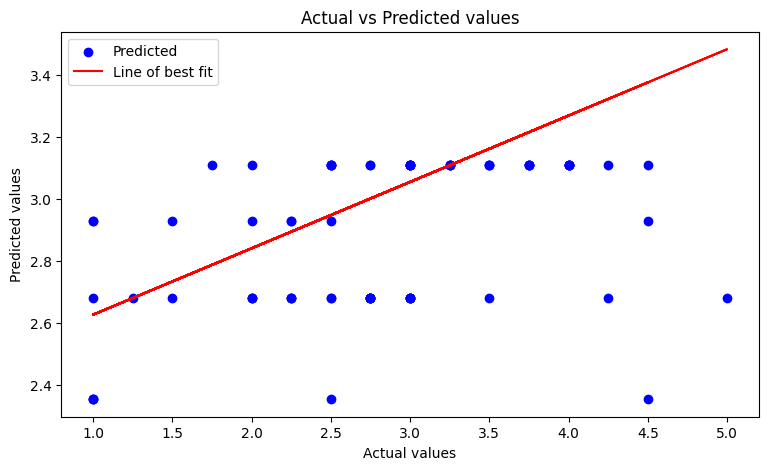

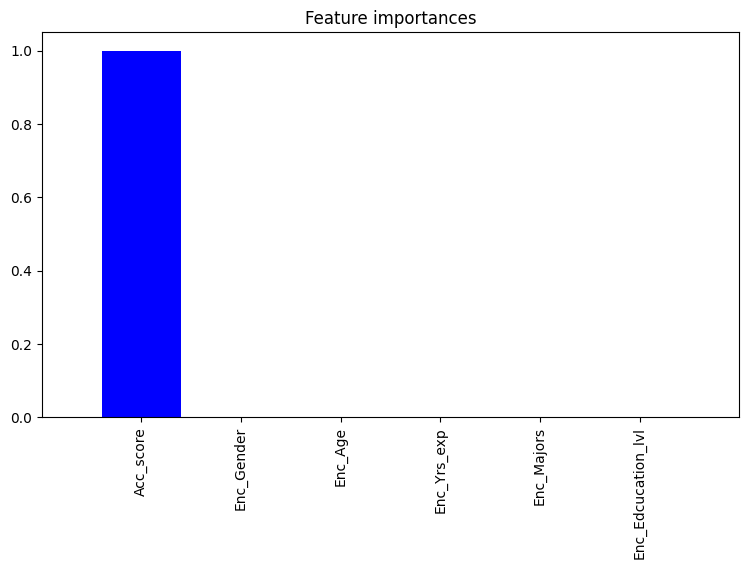

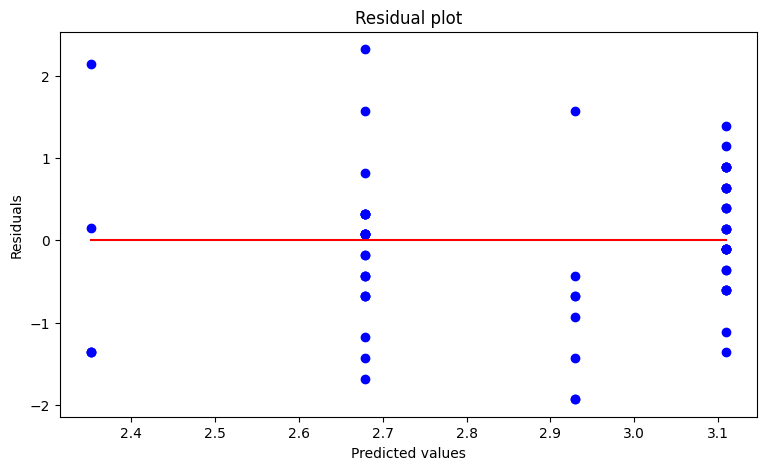

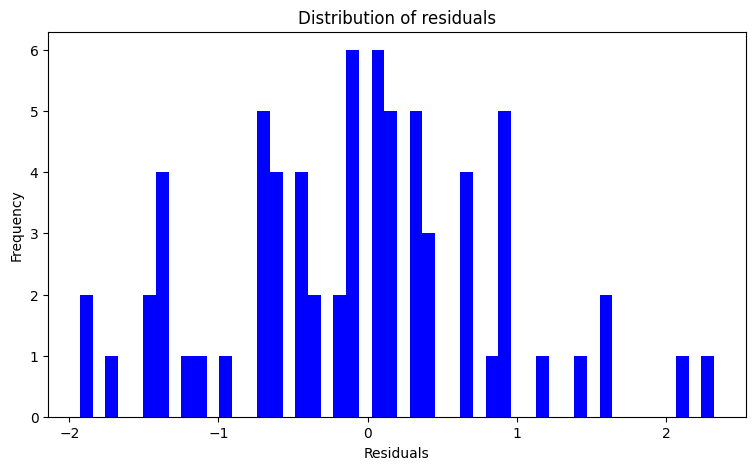

Mean squared error: 0.79503
Mean absolute error: 0.68870
R-squared score: 0.12345


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
rf_regressor = RandomForestRegressor()
grid_search = GridSearchCV(rf_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best hyperparameters: {}".format(grid_search.best_params_))
print("Best negative mean squared error: {:.5f}".format(-grid_search.best_score_))
y_predicted = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mean_squared_error_value = mean_squared_error(y_test, y_predicted)
mean_absolute_error_value = mean_absolute_error(y_test, y_predicted)
r2_score_value = r2_score(y_test, y_predicted)
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_predicted, color='b', label='Predicted')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot feature importance
importances = grid_search.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in grid_search.best_estimator_.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(9,5))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation='vertical')
plt.xlim([-1, X_train.shape[1]])
plt.show()
print("==========================================================================================================================")
# Plot residuals
residuals = y_test - y_predicted
plt.figure(figsize=(9,5))
plt.scatter(y_predicted, residuals, color='b')
plt.plot([min(y_predicted), max(y_predicted)], [0, 0], color='r')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()
print("==========================================================================================================================")
# Plot distribution of residuals
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=50, color='b')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of residuals')
plt.show()
print("==========================================================================================================================")
print("Mean squared error: {:.5f}".format(mean_squared_error_value))
print("Mean absolute error: {:.5f}".format(mean_absolute_error_value))
print("R-squared score: {:.5f}".format(r2_score_value))


## Gradient Boosting Regressor

Best parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'n_estimators': 50}
Best mean squared error: 0.83163
Mean squared error: 0.74443
Mean absolute error: 0.67162
R-squared score: 0.17924


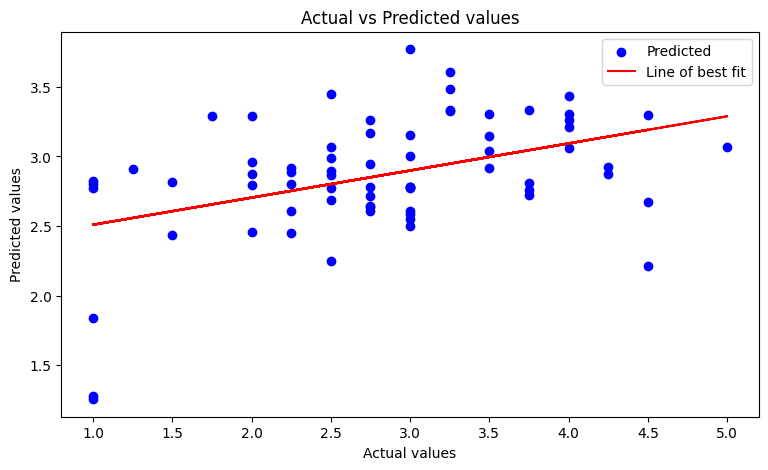

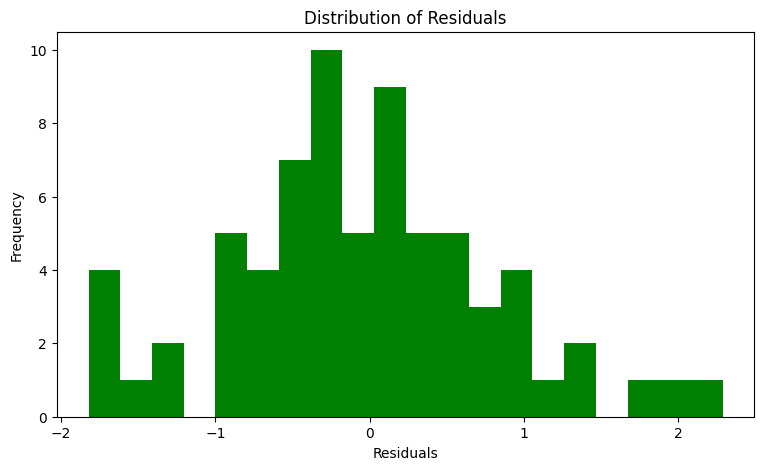

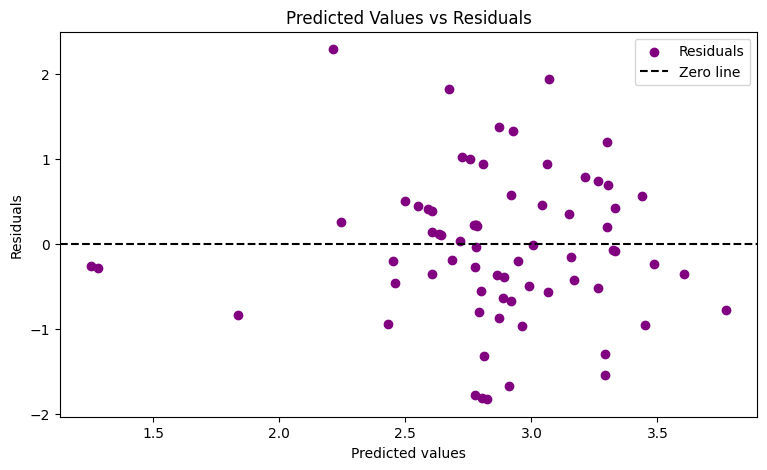

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 4, 5],
}
gb_reg = GradientBoostingRegressor()
grid_search = GridSearchCV(gb_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best mean squared error: {:.5f}".format(-grid_search.best_score_))
y_pred = grid_search.predict(X_test)
y_test=y_test.astype('float64')
# Calculate the evaluation metrics between the predicted and actual target values
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: {:.5f}".format(mse))
print("Mean absolute error: {:.5f}".format(mae))
print("R-squared score: {:.5f}".format(r2))
print("==========================================================================================================================")
# Plot the predicted values against the actual values
plt.figure(figsize=(9,5))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
# Add a line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r-', label='Line of best fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
print("==========================================================================================================================")
# Plot the distribution of residuals
residuals = y_test - y_pred
plt.figure(figsize=(9,5))
plt.hist(residuals, bins=20, color='green')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()
print("==========================================================================================================================")
# Plot the predicted values against the residuals
plt.figure(figsize=(9,5))
plt.scatter(y_pred, residuals, color='purple', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--', label='Zero line')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')
plt.legend()
plt.show()
print("==========================================================================================================================")

In [40]:
# create a dictionary to hold your data
data_1 = {'Model name': ['Decision Tree Regressor', 'Support Vector Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor'],
        'R-squared score': [0.13590, -0.09340, 0.11504, 0.08902]}

# create a Pandas DataFrame from the dictionary
df_1 = pd.DataFrame(data_1)

# highlight good R-squared scores with light blue color
def highlight_good_scores(val):
    color = 'lightblue' if val >= 0.1 else ''
    return f'background-color: {color}'

# apply the highlight function to the DataFrame
styled_df = df_1.style.applymap(highlight_good_scores, subset=['R-squared score'])

# set the border property
styled_df_1 = styled_df.set_properties(**{'border': '1px solid black'})

# display the styled DataFrame
display(styled_df_1)


,Model name,R-squared score
0,Decision Tree Regressor,0.135900
1,Support Vector Regressor,-0.093400
2,Random Forest Regressor,0.115040
3,Gradient Boosting Regressor,0.089020
